Index(['Arquitectura', 'Escalabilidad', 'Mantenibilidad', 'Complejidad',
       'Coste_Inicial'],
      dtype='object')


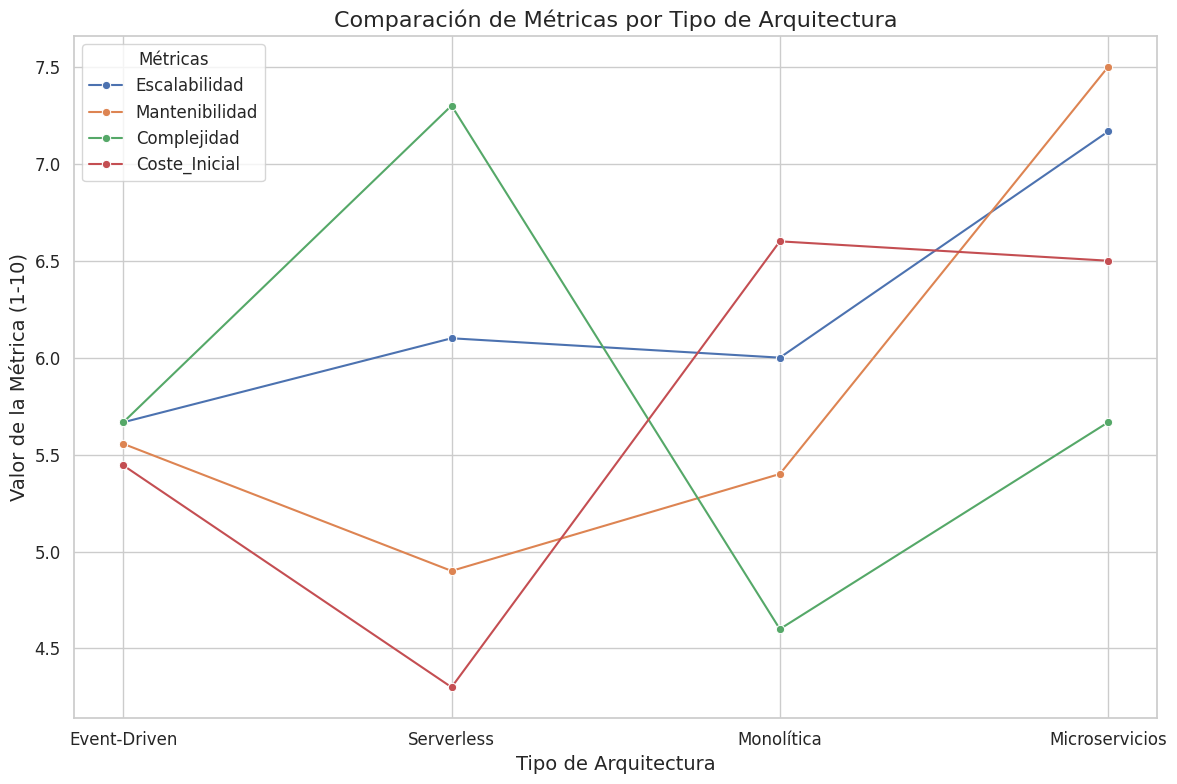

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los datos desde el archivo CSV
file_path = "./tendencia/dos.csv"  # Asegúrate de ajustar la ruta si es necesario
df = pd.read_csv(file_path, sep=';')

print(df.columns)

# Get unique architecture types
arquitecturas = df['Arquitectura'].unique()

# Create an empty list to store data for each architecture
all_data = []

# Calculate mean values for each architecture
for arquitectura in arquitecturas:
    mean_values = df[df['Arquitectura'] == arquitectura][["Escalabilidad", "Mantenibilidad", "Complejidad", "Coste_Inicial"]].mean()
    mean_values = mean_values.to_frame().T  # Transpose to get a DataFrame
    mean_values['Arquitectura'] = arquitectura  # Add the architecture type
    all_data.append(mean_values)

# Concatenate all data into a single DataFrame
mean_values_df = pd.concat(all_data, ignore_index=True)

# Configurar el estilo de visualización
sns.set(style="whitegrid")

# Crear un gráfico de líneas con diferentes métricas
plt.figure(figsize=(12, 8))
for metric in ["Escalabilidad", "Mantenibilidad", "Complejidad", "Coste_Inicial"]:
    sns.lineplot(
        data=mean_values_df,  # Now a DataFrame with multiple rows
        x="Arquitectura",
        y=metric,
        label=metric,
        marker="o",
    )

# Configurar título y etiquetas
plt.title("Comparación de Métricas por Tipo de Arquitectura", fontsize=16)
plt.xlabel("Tipo de Arquitectura", fontsize=14)
plt.ylabel("Valor de la Métrica (1-10)", fontsize=14)
plt.legend(title="Métricas", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()